# **Feature Detection using Kernels**
## By: Ayush Adarsh
### Notebook no. : 2


In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


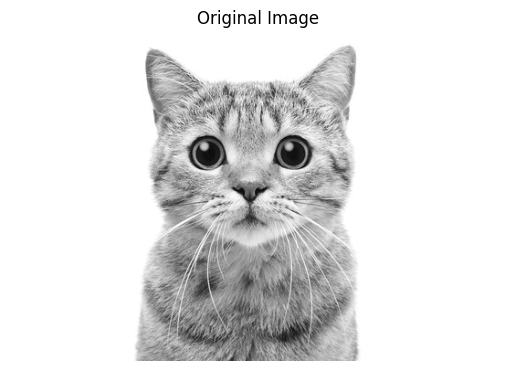

In [67]:
image = cv2.imread('Cat.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


### Converting image data to numpy array in terms of pixels values of range 0 to 255

In [68]:
numpydata = np.array(gray_image)


In [69]:
print(numpydata.shape)

(360, 543)


In [70]:
print(numpydata)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [71]:
print(numpydata[300][300]) #printing a random element

206


In [72]:
print(360*543) #total no. of pixel values in image

195480


### count is the total no. of pixel values out of all pixels values which have values other than 0 and 255 (meaningful pixels)

In [73]:
count=0
for i in range(360):
  for j in range(543):
    if ((numpydata[i][j]) != 255 and (numpydata[i][j]) != 0):
      count = count+1

print(count)



74646


In [74]:
total_pixels = 360*543 #total dimension of image
meaningful_pixels = count #pixels that are not 0 and 255
print(f"fraction of meaningful pixels: {meaningful_pixels/total_pixels}")

fraction of meaningful pixels: 0.38186003683241254


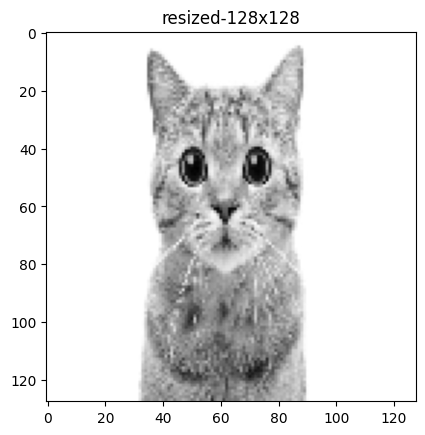

In [75]:
resized1 = cv2.resize(gray_image, (128,128))
plt.title("resized-128x128")
plt.imshow(resized1,cmap="gray")
plt.show()

In [76]:
numpydata_resized = np.array(resized1)
print(numpydata_resized.shape)

(128, 128)


In [77]:
count_resized=0
for i in range(128):
  for j in range(128):
    if ((numpydata_resized[i][j]) != 255 and (numpydata_resized[i][j]) != 0):
      count_resized= count_resized+1

print(count_resized)



6315


In [78]:
print(f"fraction of meaningful pixels in resized image: {count_resized/(128*128)}")

fraction of meaningful pixels in resized image: 0.38543701171875


We want to extract meaningful features from image

## Defining Kernels of various types

In [79]:
kernels = {
    "Sobel X": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Y": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    "Gaussian Blur": np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
}

We'll use the following six kernels:

* Sobel X:  *detects vertical edges*
* Sobel Y:  *detects horizontal edges*
* Laplacian:  *detects edges in all directions*
* Gaussian Blur:  *smooths the image*
* Emboss:  *highlights edges with a raised appearance*
* Sharpen:  *enhances edges and details*

In [80]:
for keys,values in kernels.items():
    print(keys)
    print(values)

Sobel X
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Sobel Y
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
Laplacian
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]
Gaussian Blur
[[1 2 1]
 [2 4 2]
 [1 2 1]]
Emboss
[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]
Sharpen
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


## Convolution Operation

In [81]:
def output_size(input_dim,kernel_dim,stride):
  return (int(math.floor((input_dim-kernel_dim)/stride)))+1

In [82]:
def convolution(matrix, kernel):
    matrix = np.array(matrix)
    kernel = np.array(kernel)

    kernel_length = len(kernel[0])
    kernel_breadth = len(kernel)
    matrix_length = len(matrix[0])
    matrix_breadth = len(matrix)

    output_rows = output_size(matrix_breadth, kernel_breadth,1)
    output_cols = output_size(matrix_length, kernel_length,1)
    output = np.empty([output_rows, output_cols])

    for i in range(output_rows):
        for j in range(output_cols):
            sub_matrix = matrix[i:i+kernel_breadth, j:j+kernel_length]
            output[i, j] = np.sum(sub_matrix * kernel) #simple convolution: takes dot-product b/w sub-matrix and kernel

    return output


## Performing Convolution on image and Plotting output of each kernel

In [83]:
import math

In [84]:
# Apply convolution using the defined function and kernels
filtered_images = {}
for name, kernel in kernels.items():
    filtered_images[name] = convolution(resized1, kernel)

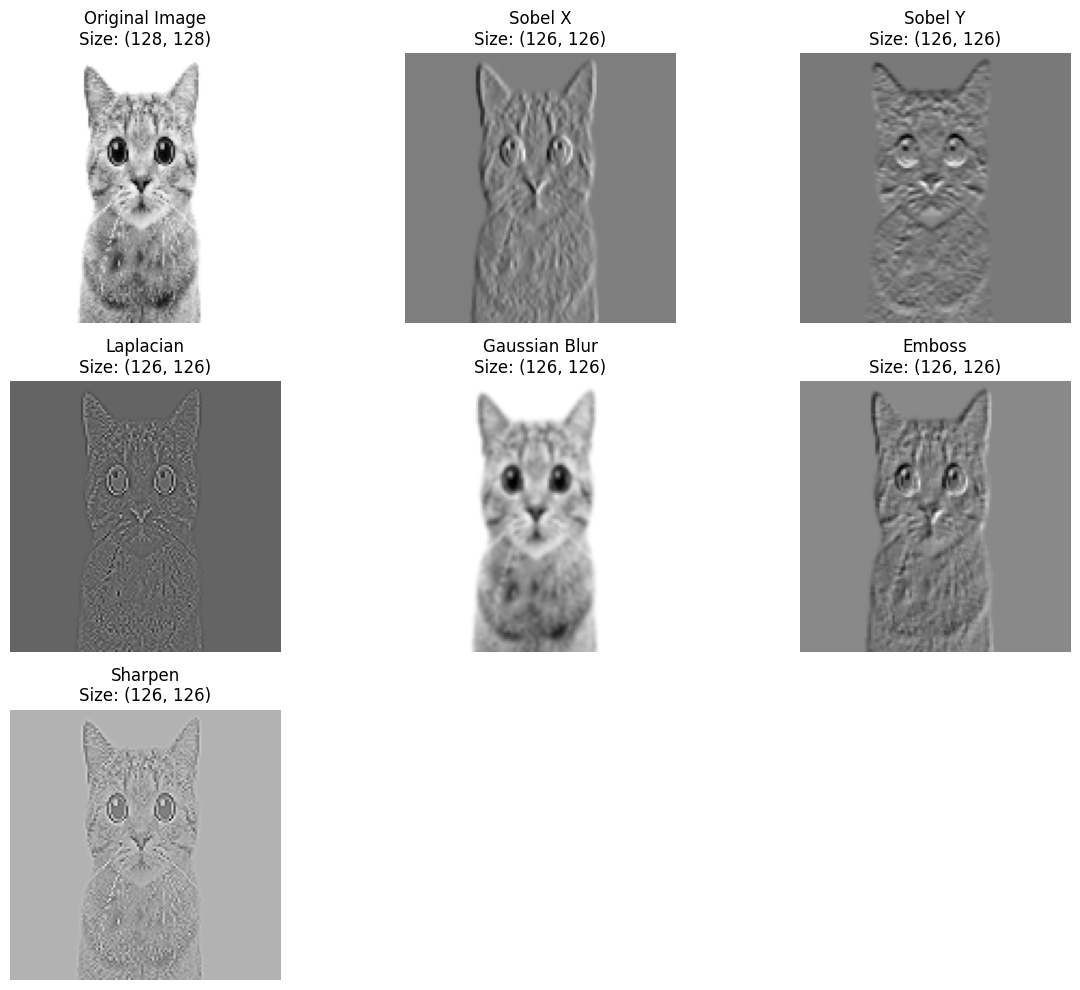

In [86]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.imshow(resized1, cmap='gray')
plt.title("Original Image\n" + f"Size: {resized1.shape}")
plt.axis('off')

for i, (name, filtered_image) in enumerate(filtered_images.items()):
    plt.subplot(3, 3, i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f"{name}\nSize: {filtered_image.shape}")
    plt.axis('off')

plt.tight_layout()
plt.show()
